In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
import seaborn as sns
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [3]:
import os
os.getcwd()

In [4]:
stress = pd.read_csv("Stress.csv")
stress.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [5]:
stress.info()
stress.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   label             2838 non-null   int64  
 5   confidence        2838 non-null   float64
 6   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 155.3+ KB


(2838, 7)

In [6]:
stress.isnull().sum().sum()

0

In [7]:
text = stress['text']
label = stress['label']
text.head()

0    He said he had not felt that way before, sugge...
1    Hey there r/assistance, Not sure if this is th...
2    My mom then hit me with the newspaper and it s...
3    until i met my new boyfriend, he is amazing, h...
4    October is Domestic Violence Awareness Month a...
Name: text, dtype: object

In [8]:
label.value_counts()

label
1    1488
0    1350
Name: count, dtype: int64

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [12]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\olani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
def datapreprocessing(text):
    output = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            output.append(token)
            
    return output

In [14]:
stress['text_clean'] = stress['text'].apply(datapreprocessing)

In [15]:
stress['text_clean_joined'] = stress['text_clean'].apply(lambda x: " ".join(x))

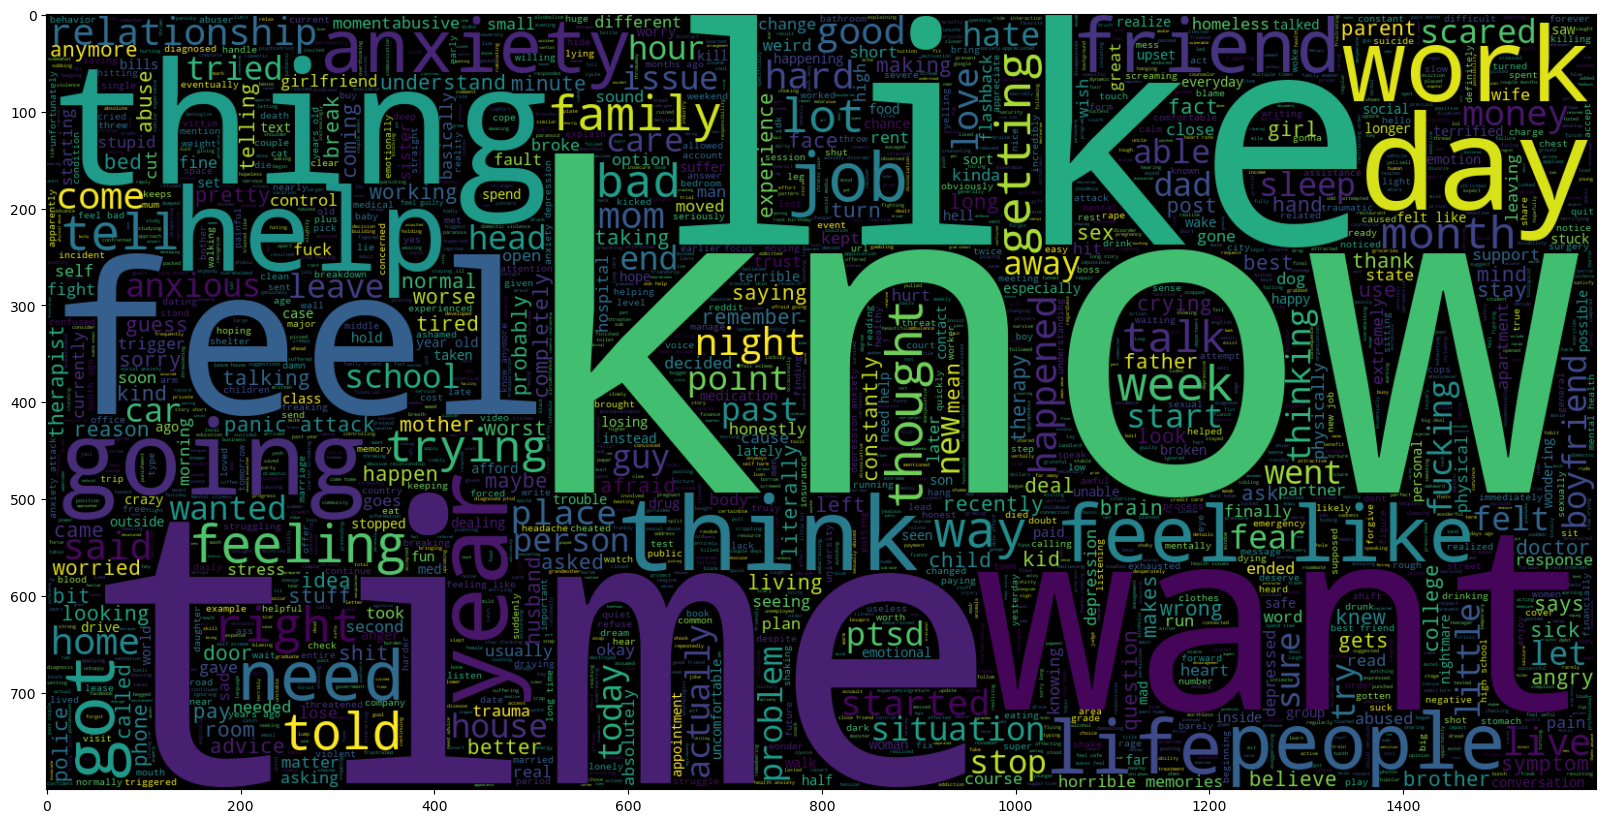

In [16]:
plt.figure(figsize = (20,20))
Word_Cloud = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(" ".join
                                                                                             (stress[stress.label == 1].text_clean_joined))
plt.imshow(Word_Cloud, interpolation = 'bilinear')

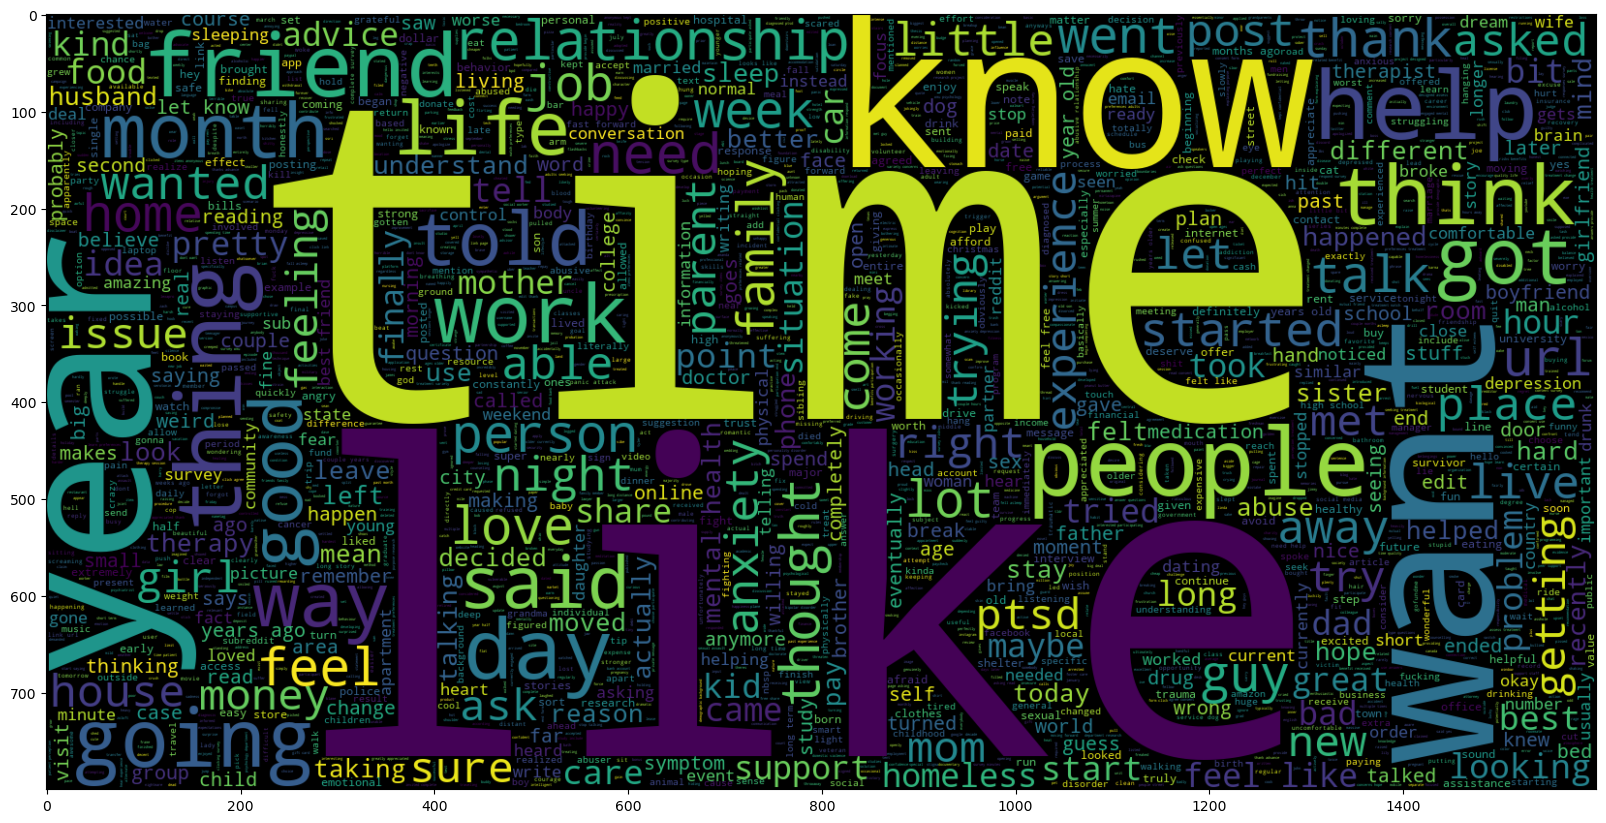

In [17]:
plt.figure(figsize = (20,20))
Word_Cloud = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(" ".join
                                                                                             (stress[stress.label == 0].text_clean_joined))
plt.imshow(Word_Cloud, interpolation = 'bilinear')

Text(0.5, 1.0, 'Label Distribution')

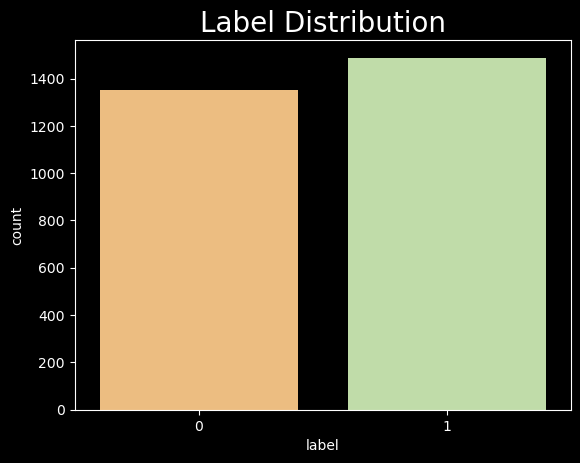

In [18]:
plt.style.use('dark_background')
sns.countplot(x=stress['label'], palette='Spectral')
plt.title('Label Distribution',fontsize=20)

In [19]:
stress['text_clean_joined']

0       said felt way suggeted rest trigger ahead youi...
1       hey assistance sure right place post goes curr...
2       mom hit newspaper shocked knows like play hitt...
3       met new boyfriend amazing kind sweet good stud...
4       october domestic violence awareness month dome...
                              ...                        
2833    week ago precious ignored jan happy year preci...
2834    ability cope anymore trying lot things trigger...
2835    case time reading post looking people willing ...
2836    normal good relationship main problem mom jail...
2837    talking mom morning said sister trauma worse d...
Name: text_clean_joined, Length: 2838, dtype: object

In [22]:
stress['text_clean_joined'] = stress['text_clean_joined'].str.replace('http', '', regex=True)

In [23]:
stress['text_clean_joined'].head() 

0    said felt way suggeted rest trigger ahead youi...
1    hey assistance sure right place post goes curr...
2    mom hit newspaper shocked knows like play hitt...
3    met new boyfriend amazing kind sweet good stud...
4    october domestic violence awareness month dome...
Name: text_clean_joined, dtype: object

In [24]:
stress_copy = stress.copy()

In [25]:
stress_copy['text_clean_joined'].head()

0    said felt way suggeted rest trigger ahead youi...
1    hey assistance sure right place post goes curr...
2    mom hit newspaper shocked knows like play hitt...
3    met new boyfriend amazing kind sweet good stud...
4    october domestic violence awareness month dome...
Name: text_clean_joined, dtype: object

In [26]:
stress_copy['new_label_name'] = stress_copy['label'].map({0: 'No Stress', 1: 'Stress'})

In [27]:
stress_copy['new_label_name'].head()

0       Stress
1    No Stress
2       Stress
3       Stress
4       Stress
Name: new_label_name, dtype: object

In [28]:
x = np.array(stress_copy['text_clean_joined'])
y = np.array(stress_copy['new_label_name'])

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split (x,y,test_size = 0.2, random_state=1)

In [30]:
vectorize = TfidfVectorizer()
xtrain = vectorize.fit_transform(xtrain)
xtest = vectorize.transform(xtest)

In [31]:
def model_logistic(xtrain, xtest, ytrain, ytest):
    global accuracy_logistic, Test_Error
    reg1 = LogisticRegression()
    reg1.fit(xtrain,ytrain)
    ypredict=reg1.predict(xtest)
    confusion=confusion_matrix(ytest,ypredict)
    accuracy_logistic = accuracy_score(ytest,ypredict)
    Test_Error = 1 - accuracy_score(ytest,ypredict)
    print ('Accuracy Score: ',accuracy_logistic)
    print ('Logistic Confusion Matrix: \n',confusion)
    print ('Test Error Rate: ',Test_Error)
    return ytest,ypredict,accuracy_logistic, Test_Error


In [32]:
print('\n')
model_logistic(xtrain, xtest, ytrain, ytest)
print('\n')



Accuracy Score:  0.7394366197183099
Logistic Confusion Matrix: 
 [[192  58]
 [ 90 228]]
Test Error Rate:  0.2605633802816901




In [35]:
reg1 = LogisticRegression()
kfold = KFold(n_splits=5)
CV_score = cross_val_score(reg1,xtrain,ytrain,cv=kfold)
print ('Cross Validation Score: ', np.mean(CV_score))

Cross Validation Score:  0.7365638766519825


In [36]:
def model_knn(xtrain, xtest, ytrain, ytest):
    global accuracy_knn, Test_Error
    reg2 = KNeighborsClassifier()
    reg2.fit(xtrain,ytrain)
    ypredict=reg2.predict(xtest)
    confusion=confusion_matrix(ytest,ypredict)
    accuracy_knn = accuracy_score(ytest,ypredict)
    Test_Error = 1 - accuracy_score(ytest,ypredict)
    print ('Accuracy Score: ',accuracy_knn)
    print ('KNN Confusion Matrix: \n',confusion)
    print ('Test Error Rate: ',Test_Error)
    return ytest,ypredict,accuracy_knn,Test_Error

In [37]:
print('\n')
model_knn(xtrain, xtest, ytrain, ytest)
print('\n')



Accuracy Score:  0.6408450704225352
KNN Confusion Matrix: 
 [[143 107]
 [ 97 221]]
Test Error Rate:  0.35915492957746475




In [38]:
reg2 = KNeighborsClassifier()
kfold = KFold(n_splits=5)
CV_score = cross_val_score(reg2,xtrain,ytrain,cv=kfold)
print ('Cross Validation Score: ', np.mean(CV_score))

Cross Validation Score:  0.6383259911894272


In [39]:
def model_decision(xtrain, xtest, ytrain, ytest):
    global accuracy_decision, Test_Error
    reg3 = DecisionTreeClassifier(random_state=1)
    reg3.fit(xtrain,ytrain)
    ypredict=reg3.predict(xtest)
    confusion=confusion_matrix(ytest,ypredict)
    accuracy_decision = accuracy_score(ytest,ypredict)
    Test_Error = 1 - accuracy_score(ytest,ypredict)
    print ('Accuracy Score: ',accuracy_decision)
    print ('DecisionTree Confusion Matrix: \n',confusion)
    print ('Test Error Rate: ',Test_Error)
    return ytest,ypredict,accuracy_decision,Test_Error

In [41]:
print('\n')
model_decision(xtrain, xtest, ytrain, ytest)
print('\n')



Accuracy Score:  0.6267605633802817
DecisionTree Confusion Matrix: 
 [[166  84]
 [128 190]]
Test Error Rate:  0.37323943661971826




In [42]:
reg3 = DecisionTreeClassifier(random_state=1)
kfold = KFold(n_splits=5)
CV_score = cross_val_score(reg3,xtrain,ytrain,cv=kfold)
print ('Cross Validation Score: ', np.mean(CV_score))

Cross Validation Score:  0.6048458149779735


[Text(0.5, 0.8333333333333334, 'x[3193] <= 0.022\ngini = 0.5\nsamples = 2270\nvalue = [1100, 1170]'),
 Text(0.25, 0.5, 'x[360] <= 0.063\ngini = 0.498\nsamples = 1825\nvalue = [974, 851]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.493\nsamples = 1655\nvalue = [927, 728]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.4\nsamples = 170\nvalue = [47, 123]'),
 Text(0.75, 0.5, 'x[3466] <= 0.118\ngini = 0.406\nsamples = 445\nvalue = [126, 319]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.379\nsamples = 425\nvalue = [108, 317]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.18\nsamples = 20\nvalue = [18, 2]')]

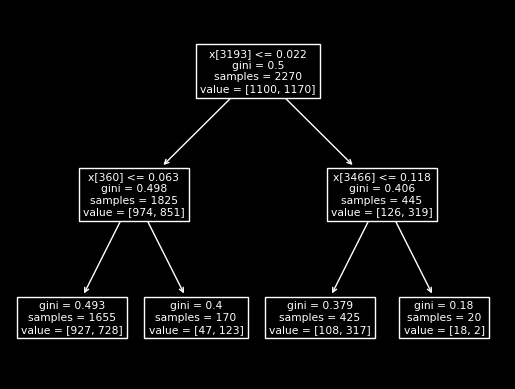

In [51]:
from sklearn.tree import plot_tree
regplot = DecisionTreeClassifier(max_depth=2,random_state=1)
regplot.fit(xtrain,ytrain)
plot_tree(regplot)

In [43]:
def model_RandomForest(xtrain, xtest, ytrain, ytest):
    global accuracy_RandomForest, Test_Error
    reg4 = RandomForestClassifier(random_state=1)
    reg4.fit(xtrain,ytrain)
    ypredict=reg4.predict(xtest)
    confusion=confusion_matrix(ytest,ypredict)
    accuracy_RandomForest = accuracy_score(ytest,ypredict)
    Test_Error = 1 - accuracy_score(ytest,ypredict)
    print ('Accuracy Score: ',accuracy_RandomForest)
    print ('RandomForest Confusion Matrix: \n',confusion)
    print ('Test Error Rate: ',Test_Error)
    return ytest,ypredict,accuracy_RandomForest,Test_Error

In [44]:
print('\n')
model_RandomForest(xtrain, xtest, ytrain, ytest)
print('\n')



Accuracy Score:  0.7341549295774648
RandomForest Confusion Matrix: 
 [[161  89]
 [ 62 256]]
Test Error Rate:  0.26584507042253525




In [143]:
reg4 = RandomForestClassifier(random_state=1)
kfold = KFold(n_splits=5)
CV_score = cross_val_score(reg4,xtrain,ytrain,cv=kfold)
print ('Cross Validation Score: ', np.mean(CV_score))

Cross Validation Score:  0.7008810572687224


In [45]:
def model_AdaBoost(xtrain, xtest, ytrain, ytest):
    global accuracy_AdaBoost, Test_Error
    reg5 = AdaBoostClassifier(random_state=1)
    reg5.fit(xtrain,ytrain)
    ypredict=reg5.predict(xtest)
    confusion=confusion_matrix(ytest,ypredict)
    accuracy_AdaBoost = accuracy_score(ytest,ypredict)
    Test_Error = 1 - accuracy_score(ytest,ypredict)
    print ('Accuracy Score: ',accuracy_AdaBoost)
    print ('AdaBoost Confusion Matrix: \n',confusion)
    print ('Test Error Rate: ',Test_Error)
    return ytest,ypredict,accuracy_AdaBoost,Test_Error

In [46]:
print('\n')
model_AdaBoost(xtrain, xtest, ytrain, ytest)
print('\n')



Accuracy Score:  0.6637323943661971
AdaBoost Confusion Matrix: 
 [[177  73]
 [118 200]]
Test Error Rate:  0.33626760563380287




In [47]:
reg5 = AdaBoostClassifier(random_state=1)
kfold = KFold(n_splits=5)
CV_score = cross_val_score(reg5,xtrain,ytrain,cv=kfold)
print ('Cross Validation Score: ', np.mean(CV_score))

Cross Validation Score:  0.6528634361233481


In [49]:
def prediction(text):
    process = datapreprocessing(text)
    embedded_words = vectorize.transform([text])
    result = reg1.predict(embedded_words)
    if result[0] == 1:
        result = "The Person is in stress"
    else:
        result = "The Person is not in stress"
    return result